In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import platform

In [2]:
df = pd.read_csv(r'C:\Users\i7 8700K\Desktop\data_visualization\dataset\hist\대전광역시 유성구_성연령별 교통사고 수_20211231.csv', encoding='cp949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960 entries, 0 to 7959
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   번호      7960 non-null   int64 
 1   기준년월    7960 non-null   object
 2   시도코드    7960 non-null   int64 
 3   시도이름    7960 non-null   object
 4   시군구코드   7960 non-null   int64 
 5   시군구이름   7960 non-null   object
 6   행정동코드   7960 non-null   int64 
 7   행정동이름   7960 non-null   object
 8   법정동코드   7960 non-null   int64 
 9   법정동이름   7960 non-null   object
 10  피해자연령대  7960 non-null   int64 
 11  피해자성별   7960 non-null   object
 12  교통사고수   7960 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 808.6+ KB


In [13]:
(df['피해자연령대'] == 10).sum()

np.int64(269)

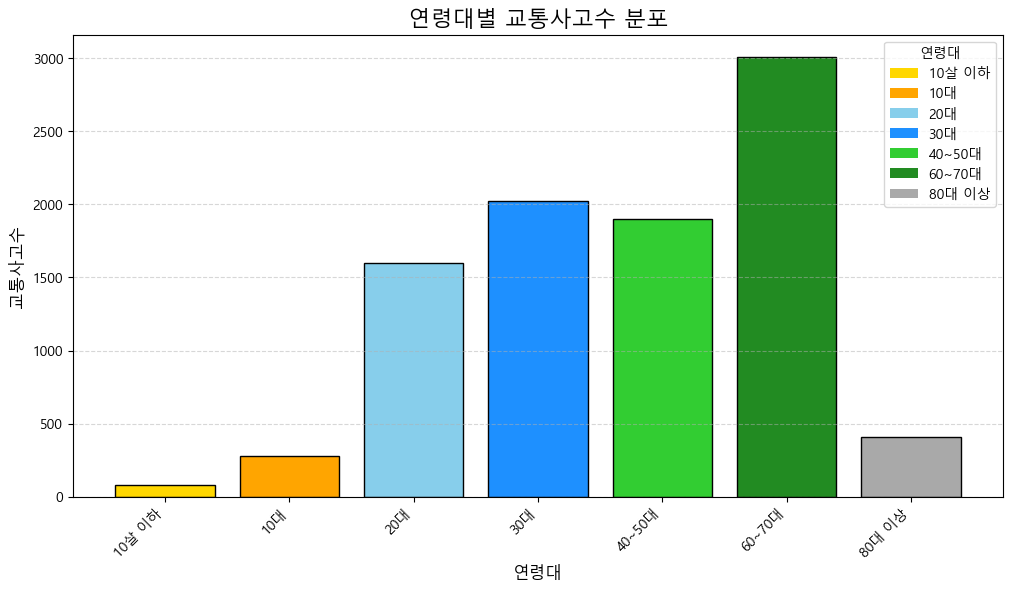

In [16]:
# 한글 깨짐 방지
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 연령대 구간 정의
def categorize_age(age):
    if age <= 9:
        return "10살 이하"
    elif age <= 19:
        return "10대"
    elif age <= 29:
        return "20대"
    elif age <= 39:
        return "30대"
    elif age <= 49:
        return "40~50대"
    elif age <= 69:
        return "60~70대"
    else:
        return "80대 이상"

# 새로운 컬럼 생성
df["연령대_범주"] = df["피해자연령대"].apply(categorize_age)

# 범주별 사고수 집계
age_counts = df.groupby("연령대_범주")["교통사고수"].sum().reindex([
    "10살 이하","10대","20대","30대","40~50대","60~70대","80대 이상"
])

# 연령대별 색상 매핑
color_map = {
    "10살 이하": "#FFD700",   # 금색
    "10대": "#FFA500",        # 주황
    "20대": "#87CEEB",        # 하늘색
    "30대": "#1E90FF",        # 도저블루
    "40~50대": "#32CD32",     # 라임그린
    "60~70대": "#228B22",     # 포레스트그린
    "80대 이상": "#A9A9A9"    # 다크그레이
}

colors = [color_map[age] for age in age_counts.index]

# 막대그래프
plt.figure(figsize=(12,6))
plt.bar(age_counts.index, age_counts.values, color=colors, edgecolor='black')

plt.title("연령대별 교통사고수 분포", fontsize=16)
plt.xlabel("연령대", fontsize=12)
plt.ylabel("교통사고수", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 범례 추가
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=age) for age, color in color_map.items()]
plt.legend(handles=legend_elements, title="연령대")

plt.show()
